<a href="https://colab.research.google.com/github/hbbalamsyah/Crime-Area-Clustering-Using-Kmeans-and-FuzzyCmeans/blob/main/Mapping_Crime_Area_K_MEANS_%26_FUZZY_C_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=154e73cd6b0cc17abbf92346e42c046a89e03a8e594b35bc859cb1c6989a21e8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Required Libraries for Clustering:

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import sklearn.cluster as skc

from sklearn.cluster import AgglomerativeClustering, KMeans,  DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import skfuzzy as fuzz

from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [ ]:
crime_data = pd.read_csv('/content/DATASET (1).csv')
crime_data.head()

,KECAMATAN,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,...,PENGRUSAKAN,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE
0,CILAMAYA WETAN,0,6,13,10,0,0,0,0,1,...,1,7,1,0,0,6,0,0,-6.243070,107.586766
1,BANYUSARI,0,6,7,4,0,0,0,0,1,...,0,3,0,0,0,7,0,0,-6.296134,107.537051
2,CILAMAYA KULON,0,4,4,3,0,1,0,0,2,...,0,4,1,0,0,6,0,0,-6.216010,107.513579
3,JATISARI,0,6,31,9,0,0,0,0,3,...,0,11,0,0,0,8,1,0,-6.353447,107.522829
4,KOTABARU,0,11,17,17,0,0,0,0,6,...,0,24,0,0,0,22,0,1,-6.393569,107.487435


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
crime_data.shape

(30, 21)

Dataset terdiri dari 30 baris dan 21 kolom

In [ ]:
crime_data.isnull().sum()

KECAMATAN        0
ABORSI           0
CABUL            0
CURANMOR         0
KEKERASAN        0
PEMALSUAN        0
PEMBUNUHAN       0
PEMERASAN        0
PENCULIKAN       0
PENCURIAN        0
PENGEROYOKAN     0
PENGRUSAKAN      0
PENIPUAN         0
PERAMPASAN       0
UU_BPJS          0
UU_DARURAT       0
UU_FIDUSIA       0
UU_ITE           0
UU_PORNOGRAFI    0
LATITUDE         0
LONGITUDE        0
dtype: int64

Tidak ada missing values pada dataset

In [ ]:
crime_data.describe()

,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,PENGEROYOKAN,PENGRUSAKAN,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.033333,5.000000,21.433333,14.433333,0.666667,0.200000,0.400000,0.033333,4.066667,6.800000,0.566667,17.866667,0.433333,0.133333,0.100000,11.466667,0.633333,0.366667,-6.257384,107.365660
std,0.182574,3.921646,27.601453,16.441502,1.241060,0.610257,0.621455,0.182574,5.085024,7.875759,1.104328,24.800908,0.773854,0.434172,0.402578,14.509767,1.129032,0.808717,0.137943,0.109204
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.515760,107.129797
25%,0.000000,2.000000,5.250000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.250000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-6.351767,107.293496
50%,0.000000,4.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,7.000000,0.000000,0.000000,0.000000,6.500000,0.000000,0.000000,-6.289496,107.356310
75%,0.000000,6.750000,27.250000,15.750000,1.000000,0.000000,1.000000,0.000000,5.750000,6.000000,1.000000,21.250000,1.000000,0.000000,0.000000,10.500000,1.000000,0.000000,-6.171743,107.445931
max,1.000000,15.000000,117.000000,62.000000,5.000000,3.000000,2.000000,1.000000,19.000000,27.000000,5.000000,107.000000,3.000000,2.000000,2.000000,66.000000,4.000000,3.000000,-6.001149,107.586766


In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KECAMATAN      30 non-null     object 
 1   ABORSI         30 non-null     int64  
 2   CABUL          30 non-null     int64  
 3   CURANMOR       30 non-null     int64  
 4   KEKERASAN      30 non-null     int64  
 5   PEMALSUAN      30 non-null     int64  
 6   PEMBUNUHAN     30 non-null     int64  
 7   PEMERASAN      30 non-null     int64  
 8   PENCULIKAN     30 non-null     int64  
 9   PENCURIAN      30 non-null     int64  
 10  PENGEROYOKAN   30 non-null     int64  
 11  PENGRUSAKAN    30 non-null     int64  
 12  PENIPUAN       30 non-null     int64  
 13  PERAMPASAN     30 non-null     int64  
 14  UU_BPJS        30 non-null     int64  
 15  UU_DARURAT     30 non-null     int64  
 16  UU_FIDUSIA     30 non-null     int64  
 17  UU_ITE         30 non-null     int64  
 18  UU_PORNOGRAF

In [ ]:
#CEK DATA DUPLIKAT
crime_data[crime_data.duplicated()]

,KECAMATAN,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,...,PENGRUSAKAN,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE


Tidak ada data duplikat/double

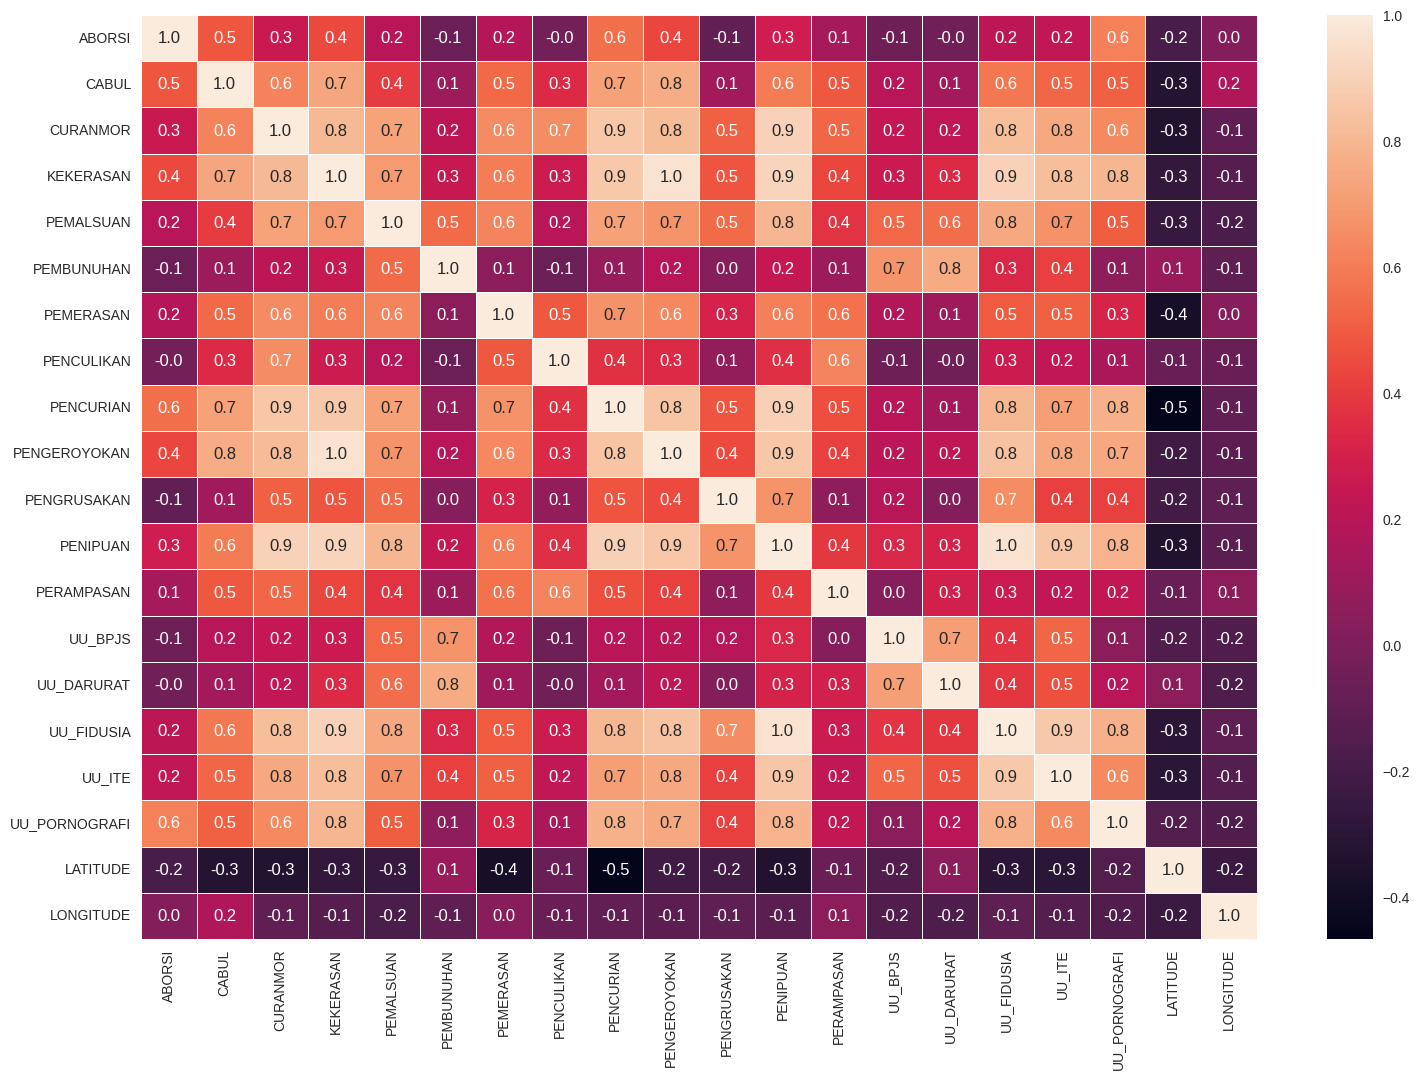

In [ ]:
# Correlation heatmap:

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(crime_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [ ]:
# Memilih kolom yang berisi jenis kejahatan
JENIS_KEJAHATAN = ['ABORSI', 'CABUL', 'CURANMOR', 'KEKERASAN', 'PEMALSUAN', 'PEMBUNUHAN', 'PEMERASAN', 'PENCULIKAN', 'PENCURIAN', 'PENGEROYOKAN', 'PENGRUSAKAN', 'PENIPUAN', 'PERAMPASAN', 'UU_BPJS', 'UU_DARURAT', 'UU_FIDUSIA', 'UU_ITE', 'UU_PORNOGRAFI']

# Menambahkan kolom "TotalKejahatan" yang berisi jumlah kejahatan dari semua jenis kejahatan di setiap kecamatan
crime_data['TOTAL_KEJAHATAN'] = crime_data[JENIS_KEJAHATAN].sum(axis=1)

crime_data

,KECAMATAN,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,...,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE,TOTAL_KEJAHATAN
0,CILAMAYA WETAN,0,6,13,10,0,0,0,0,1,...,7,1,0,0,6,0,0,-6.243070,107.586766,48
1,BANYUSARI,0,6,7,4,0,0,0,0,1,...,3,0,0,0,7,0,0,-6.296134,107.537051,32
2,CILAMAYA KULON,0,4,4,3,0,1,0,0,2,...,4,1,0,0,6,0,0,-6.216010,107.513579,26
3,JATISARI,0,6,31,9,0,0,0,0,3,...,11,0,0,0,8,1,0,-6.353447,107.522829,74
4,KOTABARU,0,11,17,17,0,0,0,0,6,...,24,0,0,0,22,0,1,-6.393569,107.487435,106
5,LEMAHABANG,0,1,3,9,0,0,1,0,1,...,9,0,0,0,4,1,0,-6.282858,107.459282,33
6,TIRTAMULYA,0,1,7,4,0,0,1,0,1,...,2,0,0,0,4,0,0,-6.334396,107.462660,22
7,CIKAMPEK,0,7,29,19,3,0,2,0,10,...,34,2,0,0,11,0,0,-6.398648,107.439504,129
8,TEMPURAN,0,5,10,3,0,0,0,0,0,...,7,0,0,0,7,0,0,-6.193671,107.448074,35
9,CILEBAR,0,1,2,2,0,0,0,0,0,...,1,0,0,0,1,0,0,-6.132694,107.411817,11


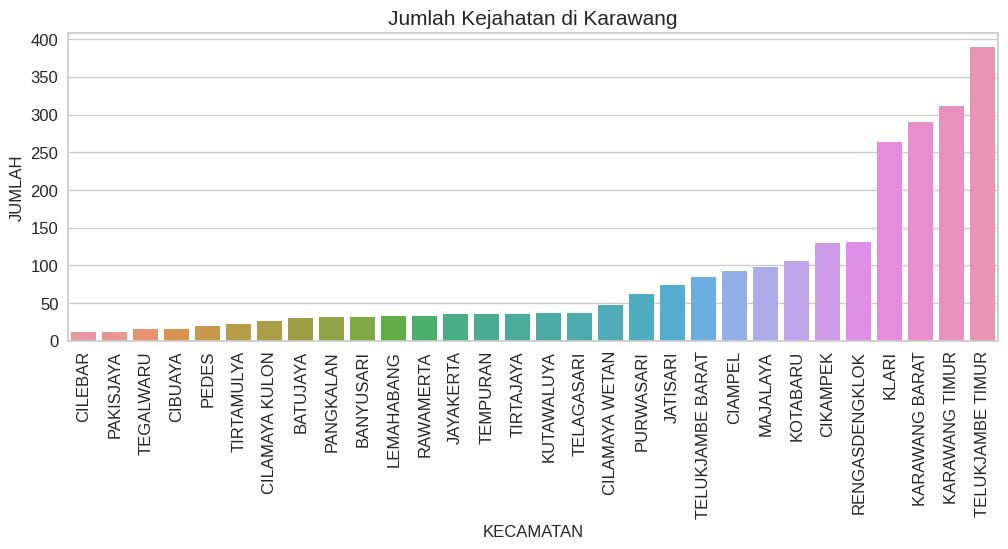

In [ ]:
#Make barplot and sort bars:

plt.figure(figsize=(12,4))
sns.barplot(x='KECAMATAN',
            y="TOTAL_KEJAHATAN",
            data=crime_data,
            order=crime_data.sort_values('TOTAL_KEJAHATAN').KECAMATAN)

#Set labels:

plt.xlabel("KECAMATAN", size=12)
plt.ylabel("JUMLAH", size=12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Jumlah Kejahatan di Karawang", size=15)
plt.show()

# **PRE-PROCESSING DATA**

In [ ]:
df = crime_data.set_index('KECAMATAN')
df.drop('TOTAL_KEJAHATAN', axis=1, inplace=True)
df.head()

,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,PENGEROYOKAN,PENGRUSAKAN,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE
KECAMATAN,,,,,,,,,,,,,,,,,,,,
CILAMAYA WETAN,0,6,13,10,0,0,0,0,1,3,1,7,1,0,0,6,0,0,-6.243070,107.586766
BANYUSARI,0,6,7,4,0,0,0,0,1,4,0,3,0,0,0,7,0,0,-6.296134,107.537051
CILAMAYA KULON,0,4,4,3,0,1,0,0,2,1,0,4,1,0,0,6,0,0,-6.216010,107.513579
JATISARI,0,6,31,9,0,0,0,0,3,5,0,11,0,0,0,8,1,0,-6.353447,107.522829
KOTABARU,0,11,17,17,0,0,0,0,6,8,0,24,0,0,0,22,0,1,-6.393569,107.487435


Membuat index berdasarkan variabel KECAMATAN, dan drop kolom TOTAL_KEJAHATAN

**STANDARISASI DATA**

In [ ]:
# Z-SCORE SCALING
# Memilih kolom yang berisi jenis kejahatan
JENIS_KEJAHATAN = ['ABORSI', 'CABUL', 'CURANMOR', 'KEKERASAN', 'PEMALSUAN', 'PEMBUNUHAN', 'PEMERASAN', 'PENCULIKAN', 'PENCURIAN', 'PENGEROYOKAN', 'PENGRUSAKAN', 'PENIPUAN', 'PERAMPASAN', 'UU_BPJS', 'UU_DARURAT', 'UU_FIDUSIA', 'UU_ITE', 'UU_PORNOGRAFI']


standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df[JENIS_KEJAHATAN])
std_df.shape

(30, 18)

Standarisasi sering digunakan dalam algoritma machine learning yang berbasis jarak, seperti KMeans, karena dapat membantu mempercepat konvergensi algoritma dan meningkatkan performa model.

In [ ]:
print(std_df)

[[-0.18569534  0.25935415 -0.31076274 -0.27425246 -0.54635836 -0.33333333
  -0.65465367 -0.18569534 -0.61338786 -0.4907415   0.39910361 -0.44564638
   0.74478352 -0.31234752 -0.25264558 -0.38319849 -0.57054227 -0.46114399]
 [-0.18569534  0.25935415 -0.53185876 -0.64542119 -0.54635836 -0.33333333
  -0.65465367 -0.18569534 -0.61338786 -0.361599   -0.52190473 -0.609688
  -0.56954034 -0.31234752 -0.25264558 -0.3131012  -0.57054227 -0.46114399]
 [-0.18569534 -0.25935415 -0.64240677 -0.70728265 -0.54635836  1.33333333
  -0.65465367 -0.18569534 -0.41337008 -0.7490265  -0.52190473 -0.56867759
   0.74478352 -0.31234752 -0.25264558 -0.38319849 -0.57054227 -0.46114399]
 [-0.18569534  0.25935415  0.35252532 -0.33611391 -0.54635836 -0.33333333
  -0.65465367 -0.18569534 -0.2133523  -0.2324565  -0.52190473 -0.28160477
  -0.56954034 -0.31234752 -0.25264558 -0.24300392  0.33031395 -0.46114399]
 [-0.18569534  1.55612489 -0.16336539  0.15877774 -0.54635836 -0.33333333
  -0.65465367 -0.18569534  0.3867010

# CLUSTERING

**KMEANS**

In [ ]:
# Pemilihan Jumlah Kluster (K) berdasarkan hasil Elbow Method
optimal_k = 3

# Melatih Model KMeans dengan jumlah kluster optimal
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_model.fit(std_df)

# Menambahkan kolom "Cluster" pada dataset
df['CLUSTER'] = kmeans_model.labels_

# Menampilkan hasil clustering
print(df[[ 'CLUSTER']])

                  CLUSTER
KECAMATAN                
CILAMAYA WETAN          0
BANYUSARI               0
CILAMAYA KULON          0
JATISARI                0
KOTABARU                0
LEMAHABANG              0
TIRTAMULYA              0
CIKAMPEK                0
TEMPURAN                0
CILEBAR                 0
TELAGASARI              0
PURWASARI               0
PEDES                   0
KLARI                   1
MAJALAYA                0
KUTAWALUYA              0
CIBUAYA                 0
KARAWANG TIMUR          1
CIAMPEL                 0
RAWAMERTA               0
RENGASDENGKLOK          0
KARAWANG BARAT          2
JAYAKERTA               0
TELUKJAMBE TIMUR        1
TELUKJAMBE BARAT        0
TIRTAJAYA               0
TEGALWARU               0
PANGKALAN               0
BATUJAYA                0
PAKISJAYA               0


In [ ]:
# Group data by Clusters (K=3):

df.groupby('CLUSTER').agg(['mean'])

,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,PENGEROYOKAN,PENGRUSAKAN,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
CLUSTER,,,,,,,,,,,,,,,,,,,,
0,0.000000,4.115385,11.961538,8.923077,0.307692,0.115385,0.269231,0.000000,2.423077,4.269231,0.384615,9.269231,0.307692,0.076923,0.038462,6.576923,0.269231,0.115385,-6.245557,107.372250
1,0.333333,11.333333,88.000000,51.000000,2.333333,0.000000,1.333333,0.333333,16.333333,24.333333,2.000000,75.666667,1.333333,0.000000,0.000000,42.000000,2.666667,2.333333,-6.346909,107.332814
2,0.000000,9.000000,68.000000,48.000000,5.000000,3.000000,1.000000,0.000000,10.000000,20.000000,1.000000,68.000000,1.000000,2.000000,2.000000,47.000000,4.000000,1.000000,-6.296307,107.292859


<Figure size 1200x600 with 0 Axes>

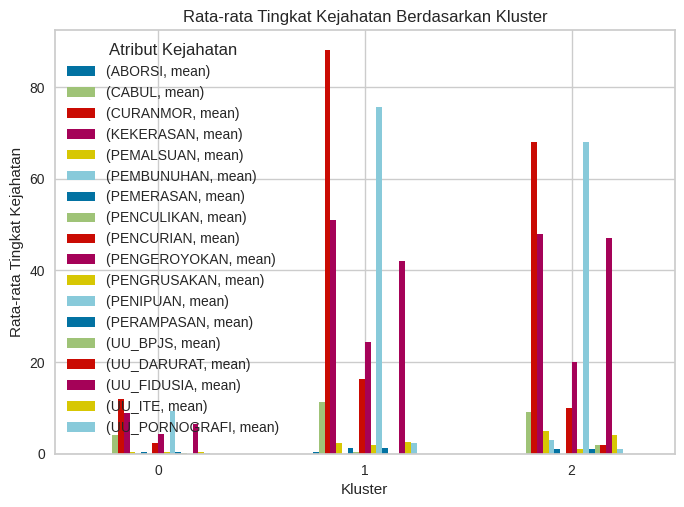

In [ ]:
# Membuat DataFrame baru tanpa kolom LATITUDE dan LONGITUDE
df_baru = df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=False)

# Group data by Clusters and calculate the mean
cluster_means = df_baru.groupby('CLUSTER').agg(['mean'])

# Menampilkan grafik batang untuk rata-rata tingkat kejahatan masing-masing kluster
plt.figure(figsize=(12, 6))
cluster_means.plot(kind='bar')
plt.title('Rata-rata Tingkat Kejahatan Berdasarkan Kluster')
plt.xlabel('Kluster')
plt.ylabel('Rata-rata Tingkat Kejahatan')
plt.xticks(rotation=0)
plt.legend(title='Atribut Kejahatan')
plt.grid(True)
plt.show()


In [ ]:
#df.to_csv('baru.csv')

In [ ]:
#Menghitung Mean tiap cluster secara manual di excel
#total_mean = df.groupby('CLUSTER').agg(['mean'])
#print(total_mean)
#total_mean.to_csv('total mean.csv')

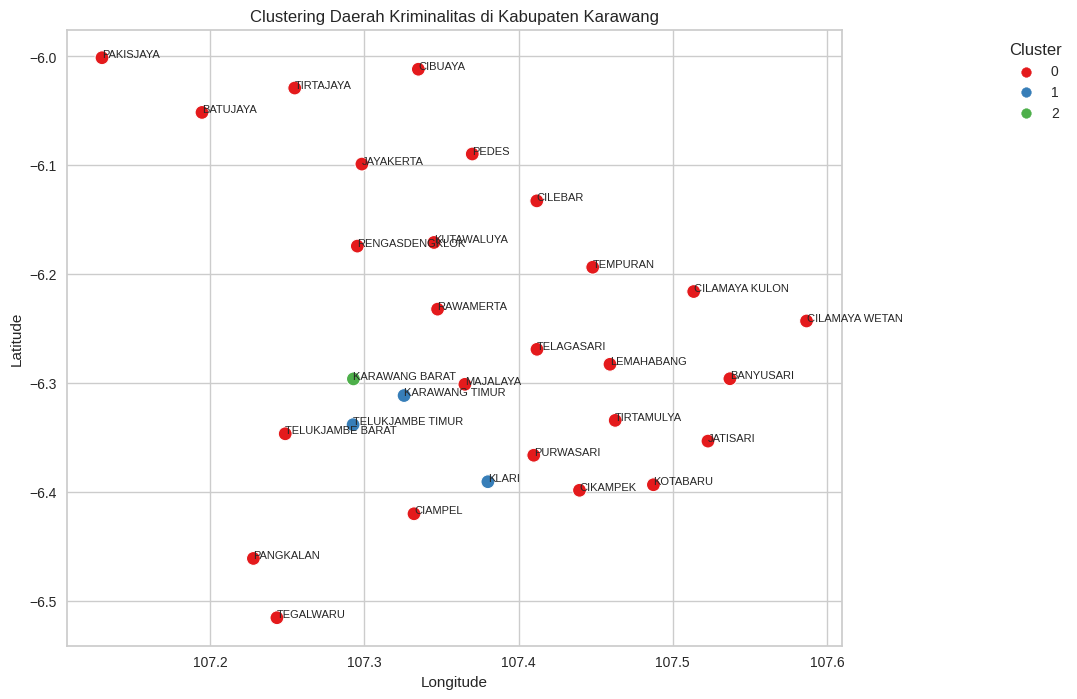

In [ ]:
# Visualisasi hasil clustering dengan nama kecamatan pada tiap titik
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CLUSTER', data=df, palette='Set1', s=100)
plt.title('Clustering Daerah Kriminalitas di Kabupaten Karawang')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)

# Menambahkan label nama kecamatan pada tiap titik
for KECAMATAN, row in df.iterrows():
    scatter_plot.text(row['LONGITUDE'], row['LATITUDE'], KECAMATAN, fontsize=8)

plt.show()

In [ ]:
import plotly.graph_objects as go

# Group data by Clusters and calculate the mean
cluster_means = df.groupby('CLUSTER').agg(['mean'])

# Daftar warna untuk ikon berdasarkan kluster
colors = ['green', 'red', 'blue']


# Membuat figure dan scattermapbox plot
fig = go.Figure()

# Menambahkan data untuk setiap kluster ke scattermapbox plot
for KECAMATAN, row in df.iterrows():
    cluster_color = colors[int(row['CLUSTER']) % len(colors)]
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['LATITUDE']],
            lon=[row['LONGITUDE']],
            mode='markers',
            marker=dict(
                size=12,
                color=cluster_color,
                colorscale='Viridis',
                cmin=0,
                cmax=cluster_means.index.max(),
                opacity=0.7,
                colorbar=dict(
                    title="Cluster"
                )
            ),
            text=f"Cluster: {row['CLUSTER']}<br>Kecamatan: {KECAMATAN}"
        )
    )

# Menentukan layout peta dan mode tampilan peta
fig.update_layout(
    mapbox_style="carto-positron",  # Anda dapat mengganti dengan tampilan peta yang berbeda sesuai keinginan
    mapbox=dict(
        center=dict(lat=df['LATITUDE'].mean(), lon=df['LONGITUDE'].mean()),
        zoom=10
    ),
    title_text="Visualisasi Hasil Clustering dengan Latitude dan Longitude"
)

fig.show()

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,540.000000
1,2,291.758997
2,3,222.135208
3,4,176.789776
4,5,138.933369
5,6,104.127217
6,7,84.323405
7,8,72.698838
8,9,58.703612
9,10,49.230728


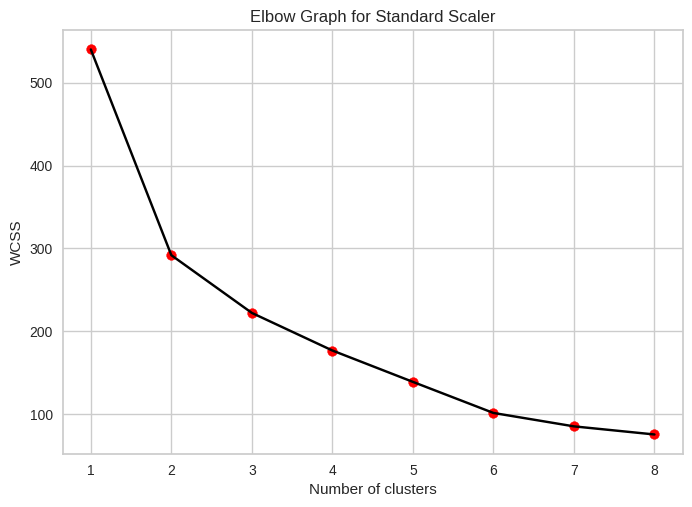

In [ ]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K-values range Vs WCSS to get Elbow graph for choosing K (No. of clusters):

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.617802736537043


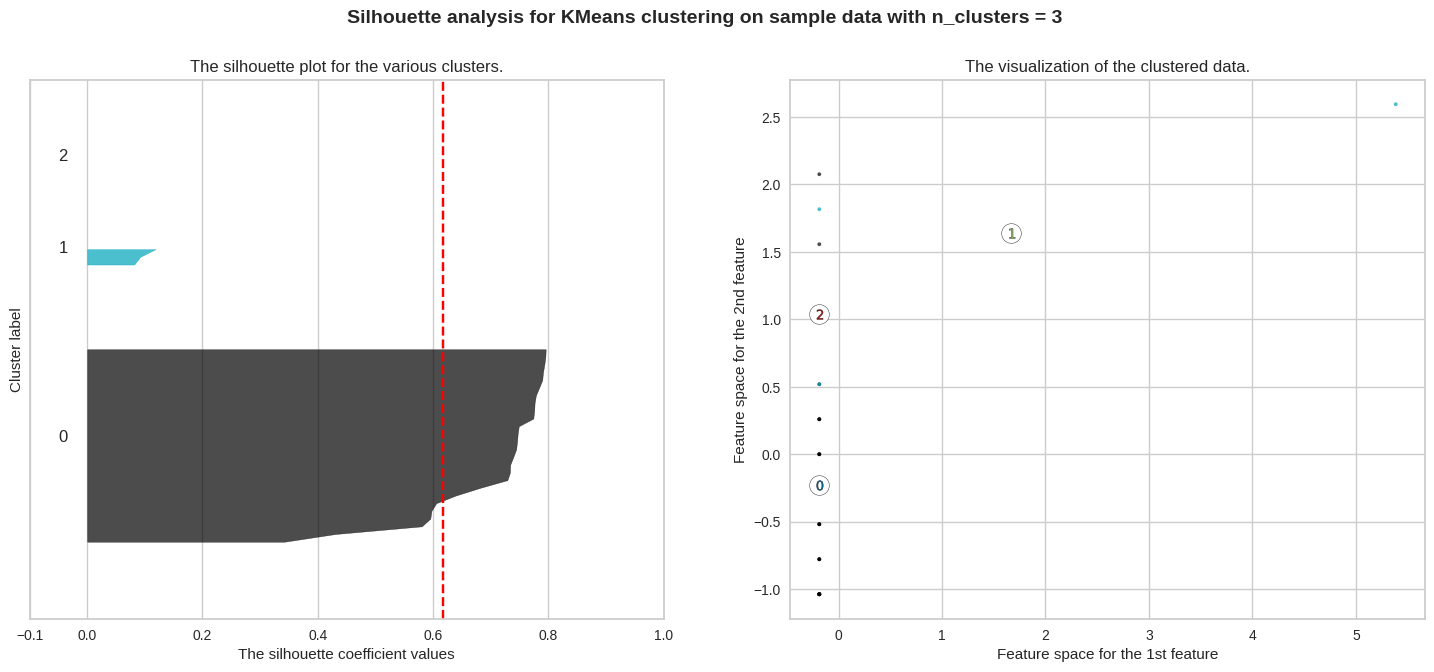

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3]
X = std_df

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# FUZZY C MEANS

Nilai Silhouette Score untuk Model Fuzzy C-Means: 0.2966835004208153


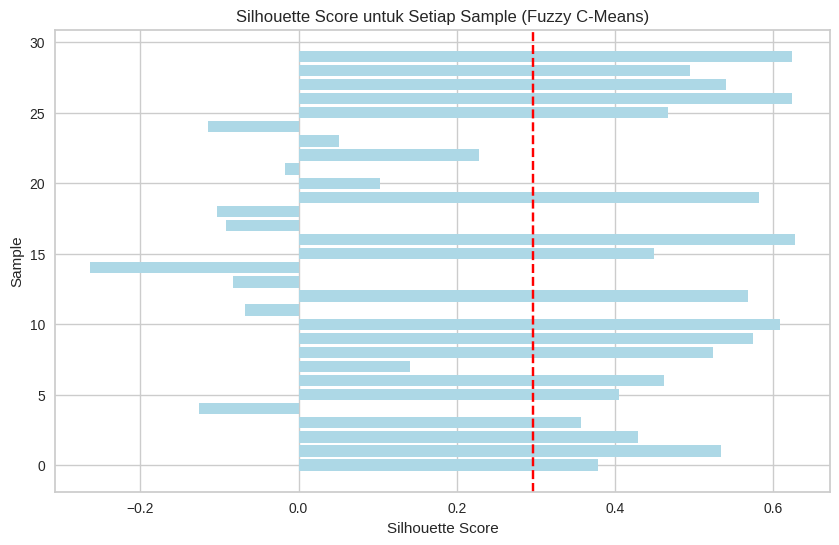

In [ ]:
# Membaca dataset
fuzzy = pd.read_csv('/content/DATASET (1).csv')

# Memilih kolom yang berisi jenis kejahatan
JENIS_KEJAHATAN = ['ABORSI', 'CABUL', 'CURANMOR', 'KEKERASAN', 'PEMALSUAN', 'PEMBUNUHAN', 'PEMERASAN', 'PENCULIKAN', 'PENCURIAN', 'PENGEROYOKAN', 'PENGRUSAKAN', 'PENIPUAN', 'PERAMPASAN', 'UU_BPJS', 'UU_DARURAT', 'UU_FIDUSIA', 'UU_ITE', 'UU_PORNOGRAFI']

# Mengambil atribut kejahatan dari dataset
X = fuzzy[JENIS_KEJAHATAN].values

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah kluster
n_clusters = 3  # Ganti sesuai dengan jumlah kluster yang diinginkan

# Menggunakan algoritma Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

# Menghitung kluster dengan nilai keanggotaan tertinggi untuk setiap data
max_membership_cluster = np.argmax(u, axis=0)

# Menambahkan hasil kluster ke dalam dataset
fuzzy['FCM_Cluster'] = max_membership_cluster

# Menghitung nilai silhouette score
silhouette_avg = silhouette_score(X_scaled, max_membership_cluster)

# Menghitung nilai silhouette score untuk setiap sampel
silhouette_values = silhouette_samples(X_scaled, max_membership_cluster)

# Menambahkan nilai silhouette score ke dalam dataset
fuzzy['Silhouette_Score'] = silhouette_values

# Mencetak nilai silhouette score
print("Nilai Silhouette Score untuk Model Fuzzy C-Means:", silhouette_avg)

# Membuat bar plot untuk visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.barh(range(len(fuzzy)), silhouette_values, color='lightblue')
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.ylabel("Sample")
plt.xlabel("Silhouette Score")
plt.title("Silhouette Score untuk Setiap Sample (Fuzzy C-Means)")
plt.show()

In [ ]:
print(fuzzy['FCM_Cluster'])

0     2
1     2
2     2
3     2
4     0
5     2
6     2
7     0
8     2
9     2
10    2
11    0
12    2
13    1
14    0
15    2
16    2
17    1
18    0
19    2
20    0
21    1
22    2
23    1
24    0
25    2
26    2
27    2
28    2
29    2
Name: FCM_Cluster, dtype: int64


In [ ]:
# Group data by Clusters (K=3):

fuzzy.groupby('FCM_Cluster').agg(['mean'])

,ABORSI,CABUL,CURANMOR,KEKERASAN,PEMALSUAN,PEMBUNUHAN,PEMERASAN,PENCULIKAN,PENCURIAN,PENGEROYOKAN,...,PENIPUAN,PERAMPASAN,UU_BPJS,UU_DARURAT,UU_FIDUSIA,UU_ITE,UU_PORNOGRAFI,LATITUDE,LONGITUDE,Silhouette_Score
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
FCM_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.00,7.571429,23.000000,17.428571,0.857143,0.000000,0.714286,0.00,6.142857,8.571429,...,21.428571,0.571429,0.285714,0.000000,12.142857,0.571429,0.142857,-6.343023,107.368306,-0.061647
1,0.25,10.750000,83.000000,50.250000,3.000000,0.750000,1.250000,0.25,14.750000,23.250000,...,73.750000,1.250000,0.500000,0.500000,43.250000,3.000000,2.000000,-6.334259,107.322825,-0.035085
2,0.00,2.842105,7.894737,5.789474,0.105263,0.157895,0.105263,0.00,1.052632,2.684211,...,4.789474,0.210526,0.000000,0.052632,4.526316,0.157895,0.105263,-6.209648,107.373703,0.498546


In [ ]:
import plotly.graph_objects as go

# Group data by Clusters and calculate the mean
cluster_means = fuzzy.groupby('FCM_Cluster').agg(['mean'])

# Daftar warna untuk ikon berdasarkan kluster
colors = ['green', 'red', 'blue']


# Membuat figure dan scattermapbox plot
fig = go.Figure()

# Menambahkan data untuk setiap kluster ke scattermapbox plot
for KECAMATAN, row in fuzzy.iterrows():
    cluster_color = colors[int(row['FCM_Cluster']) % len(colors)]
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['LATITUDE']],
            lon=[row['LONGITUDE']],
            mode='markers',
            marker=dict(
                size=12,
                color=cluster_color,
                colorscale='Viridis',
                cmin=0,
                cmax=cluster_means.index.max(),
                opacity=0.7,
                colorbar=dict(
                    title="Cluster"
                )
            ),
            text=f"Cluster: {row['FCM_Cluster']}<br>Kecamatan: {KECAMATAN}"
        )
    )

# Menentukan layout peta dan mode tampilan peta
fig.update_layout(
    mapbox_style="carto-positron",  # Anda dapat mengganti dengan tampilan peta yang berbeda sesuai keinginan
    mapbox=dict(
        center=dict(lat=fuzzy['LATITUDE'].mean(), lon=fuzzy['LONGITUDE'].mean()),
        zoom=10
    ),
    title_text="Visualisasi Hasil Clustering dengan Latitude dan Longitude"
)

fig.show()

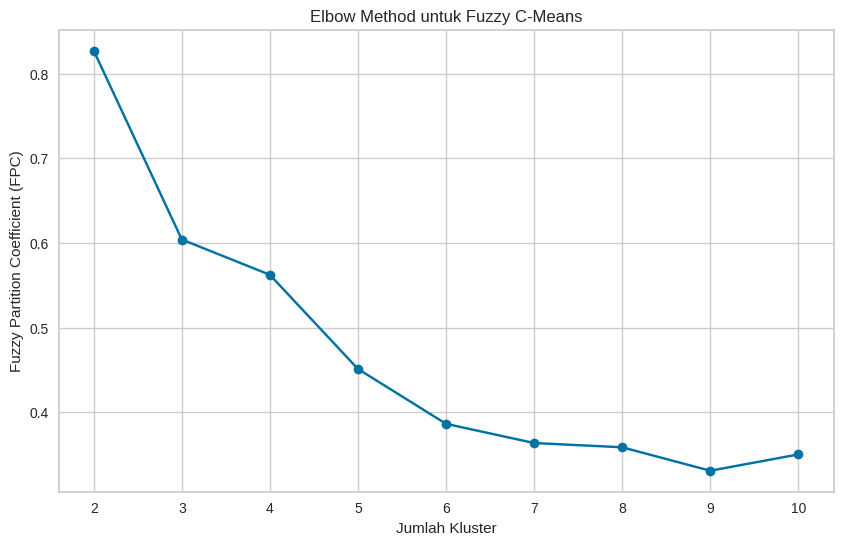

In [ ]:
# Inisialisasi list untuk menyimpan nilai fuzzy partition coefficient (FPC)
fpc_scores = []

# Mencoba jumlah kluster dari 2 hingga 10
for n_clusters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)
    fpc_scores.append(fpc)

# Menampilkan plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), fpc_scores, marker='o')
plt.title('Elbow Method untuk Fuzzy C-Means')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.grid(True)
plt.show()

Nilai Silhouette Score untuk Model Fuzzy C-Means: 0.4959661233771186


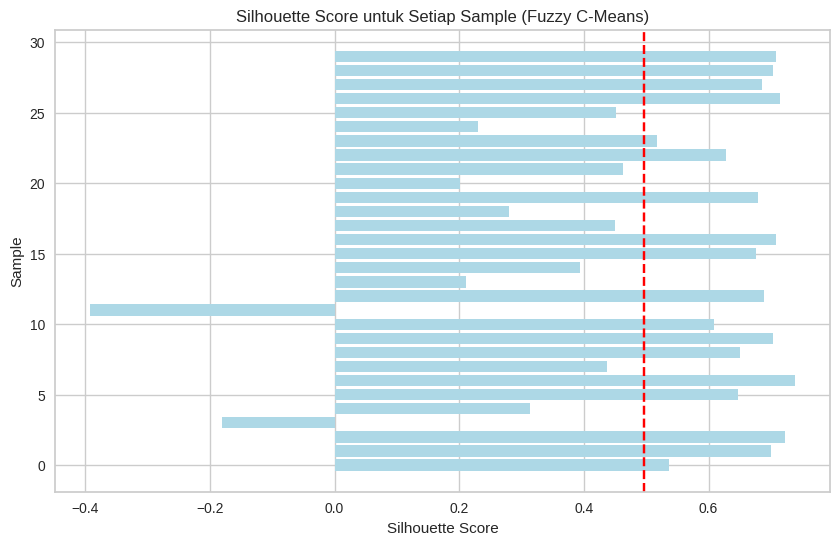

In [ ]:
# Menghitung nilai silhouette score
silhouette_avg = silhouette_score(X, max_membership_cluster)

# Menghitung nilai silhouette score untuk setiap sampel
silhouette_values = silhouette_samples(X, max_membership_cluster)

# Menambahkan nilai silhouette score ke dalam dataset
fuzzy['Silhouette_Score'] = silhouette_values

# Mencetak nilai silhouette score
print("Nilai Silhouette Score untuk Model Fuzzy C-Means:", silhouette_avg)

# Membuat bar plot untuk visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.barh(range(len(fuzzy)), silhouette_values, color='lightblue')
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.ylabel("Sample")
plt.xlabel("Silhouette Score")
plt.title("Silhouette Score untuk Setiap Sample (Fuzzy C-Means)")
plt.show()

ARI KMEANS

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Menghitung nilai Adjusted Rand Index (ARI) membandingan dengan label cluster FUZZY C MEANS
true_labels = fuzzy['FCM_Cluster']
ari = adjusted_rand_score(true_labels, df['CLUSTER'])
print(f"Adjusted Rand Index (ARI) untuk K-Means: {ari}")

Adjusted Rand Index (ARI) untuk K-Means: 0.4019530539212713


ARI FUZZY

In [ ]:
# Hitung akurasi (Adjusted Rand Index) membandingan dengan label cluster K MEANS

true_labels = df['CLUSTER']
ari = adjusted_rand_score(true_labels, fuzzy['FCM_Cluster'])
print(f"Adjusted Rand Index (ARI) untuk FCM: {ari}")

Adjusted Rand Index (ARI) untuk FCM: 0.4019530539212713
